<a href="https://colab.research.google.com/github/Pranayshukla0610/Web-Scraping-Python/blob/main/Web_Scraper_On_E_Commerce_Trend_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4 lxml pandas matplotlib seaborn plotly aiohttp asyncio kaggle

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://webscraper.io/test-sites/e-commerce/static/computers/laptops"

headers = {
    "User-Agent":"Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text,'lxml')

products = soup.find_all("div", class_='thumbnail')

data=[]

for product in products:
  title = product.find("a", class_='title').text.strip()
  price = product.find("h4", class_='price').text.strip()
  rating = len(product.find_all("span",class_='glyphicon-star'))
  description = product.find("p", class_='description').text.strip()

  data.append([title,price,rating,description])

df = pd.DataFrame(data,columns=["Title","Price","Rating","description"])
df.head()

,Title,Price,Rating,description
0,Packard 255 G2,$416.99,0,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows..."
1,Aspire E1-510,$306.99,0,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux"
2,ThinkPad T540p,$1178.99,0,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit"
3,ProBook,$739.99,0,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit"
4,ThinkPad X240,$1311.99,0,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro..."


In [3]:
base_url = "https://webscraper.io/test-sites/e-commerce/static/computers/laptops?page={}"

all_data = []

for page in range(1,5):
  url = base_url.format(page)
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')

  products = soup.find_all("div", class_="thumbnail")

  for product in products:
    title = product.find("a", class_='title').text.strip()
    price = product.find("h4", class_='price').text.strip()
    rating = len(product.find_all('span',class_='glyphicon-star'))
    description = product.find("p", class_='description').text.strip()

    all_data.append([title, price, rating, description])

df = pd.DataFrame(all_data, columns=["Title","Price","Rating","Description"])

In [4]:
df.head()

,Title,Price,Rating,Description
0,Packard 255 G2,$416.99,0,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows..."
1,Aspire E1-510,$306.99,0,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux"
2,ThinkPad T540p,$1178.99,0,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit"
3,ProBook,$739.99,0,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit"
4,ThinkPad X240,$1311.99,0,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro..."


In [5]:
df['Price'] = df['Price'].str.replace("$","").astype(float)
df['Title Length'] = df['Title'].apply(len)
df['Desc Length'] = df['Description'].apply(len)
df['High Rated'] = df['Rating'].apply(lambda x: "Yes" if x>=4 else 0)
df.head()

,Title,Price,Rating,Description,Title Length,Desc Length,High Rated
0,Packard 255 G2,416.99,0,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",14,50,0
1,Aspire E1-510,306.99,0,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",13,47,0
2,ThinkPad T540p,1178.99,0,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit",14,48,0
3,ProBook,739.99,0,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit",7,47,0
4,ThinkPad X240,1311.99,0,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro...",13,52,0


In [6]:
df['Price per Rating'] = df['Price']/(df['Rating'] + 1)
df['Premium_Product'] = df['Price'].apply(lambda x : 1 if x > df['Price'].mean() else 0)

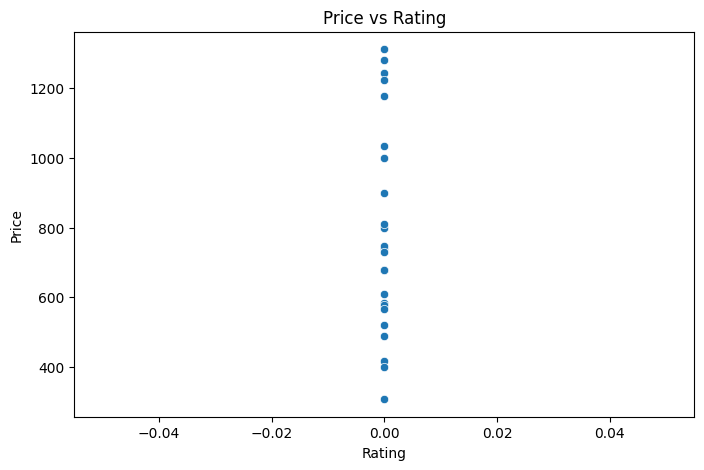

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x="Rating", y="Price", data=df)
plt.title("Price vs Rating")
plt.show()

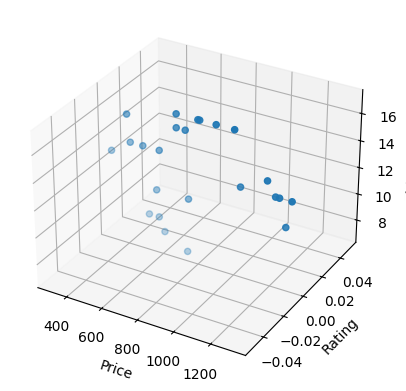

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Price"], df["Rating"], df["Title Length"])

ax.set_xlabel("Price")
ax.set_ylabel("Rating")
ax.set_zlabel("Title Length")

plt.show()

In [12]:
import aiohttp
import asyncio
from bs4 import BeautifulSoup

async def fetch(session, url):
  async with session.get(url) as response:
    return await response.text()

async def scrape():
  urls = [base_url.format(page) for page in range(1,5)]

  async with aiohttp.ClientSession() as session:
    tasks = [fetch(session,url) for url in urls]
    pages = await asyncio.gather(*tasks)

    for page in pages:
      soup = BeautifulSoup(page,'lxml')
      products = soup.find_all('div', class_='thumbnail')
      print(len(products))

await scrape()

6
6
6
6


In [13]:
import random
import time

for page in range(1,5):
  time.sleep(random.uniform(1,3))

In [14]:
df["In_Stock"] = df["Rating"].apply(lambda x: 1 if x > 0 else 0)

In [15]:
low_stock = df[df["In_Stock"] == 0]

In [16]:
df.to_csv("product_tracking.csv", index=False)